<a href="https://colab.research.google.com/github/Prima-7272/iPhone15promax/blob/main/Copy_of_FirstEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Exploratory Data Analysis (EDA) and Visualization


## FINDEX (Global Financial Index Microdata) and it's business context

The Global Findex database is the most comprehensive dataset on adult financial behaviors worldwide, capturing insights into how individuals save, borrow, make payments, and manage financial risks. Initiated by the World Bank in 2011, the dataset is based on nationally representative surveys of over 150,000 adults across more than 140 economies. The 2021 edition provides updated indicators on the use of both formal and informal financial services.

For this analysis, we will conduct an Exploratory Data Analysis (EDA) to uncover key patterns and trends in the financial behaviors of individuals globally. As this analysis is undertaken by a group of finance students with a strong interest in banking and personal finance, our focus will be on examining how different demographics access and use financial services across various economies. The insights drawn will help highlight potential areas of financial inclusion and opportunities for improving financial services globally.

In this assignment I want to research the impact of Social Welfare Programs on economic behavior. Social welfare programs, including social transfers, pensions, and remittances, play a crucial role in supporting vulnerable populations and enhancing economic stability. These programs are designed to reduce poverty, improve living standards, and stimulate economic activity by providing financial resources directly to individuals or households. Understanding the impact of these programs on the economic behavior of recipients is essential for governments and NGOs to optimize resource allocation and program design.

Research question: **What is the impact of receiving social transfers, pensions, or remittances on the economic behavior of individuals?**


**Business Problem**
Governments and NGOs need to optimize the distribution of social welfare resources to maximize their impact on economic stability and growth. By understanding how these resources affect recipients' economic behaviors—such as spending patterns, savings rates, and investment in education or healthcare—policymakers can design more effective welfare programs that not only alleviate immediate needs but also promote long-term economic development.

## Data Cleaning and Manipulation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Initially, the data couldn’t be read with UTF-8 due to special characters. Using ChatGPT we found that latin-1 supports these characters, allowing for proper file decoding.
# data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip')

In [3]:
# Reading the data using the raw URL on github
data = pd.read_csv('https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/FINDEX/WLD_2021_FINDEX_v03_M_csv.zip', encoding='latin-1')

### Initial Data Structure Overview: Head, Info, Shape, Index, and Column Names

In [4]:
data.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,Afghanistan,AFG,South Asia,22647496.0,144274031,0.716416,2,43.0,2,4,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,Afghanistan,AFG,South Asia,22647496.0,180724554,0.497408,2,55.0,1,3,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,Afghanistan,AFG,South Asia,22647496.0,130686682,0.650431,1,15.0,1,2,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,Afghanistan,AFG,South Asia,22647496.0,142646649,0.991862,2,23.0,1,4,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,Afghanistan,AFG,South Asia,22647496.0,199055310,0.554940,1,46.0,1,1,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143887 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 140.5+ MB


In [6]:
data.shape

(143887, 128)

In [7]:
data.index

RangeIndex(start=0, stop=143887, step=1)

In [8]:
data.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_transfers', 'receive_pension', 'receive_agriculture',
       'pay_utilities', 'remittances', 'mobileowner', 'internetaccess',
       'anydigpayment', 'merchantpay_dig', 'year'],
      dtype='object', length=128)

### Checking for missing values

In [ ]:
# Do to the size of the Dataset we filter columns with missing values greater than 0. We look further into all the
# missing values with pd.set_option('display.max_rows', None) was used afterwards using pd.reset_option('display.max_rows')
pd.reset_option('display.max_rows')
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
regionwb,1000
age,467
emp_in,3502
urbanicity_f2f,68243
account_mob,61181
...,...
fin45_1,33106
fin45_1_China,140387
receive_agriculture,29606
remittances,29606


In [ ]:
# Filter rows where 'regionwb' is missing (NaN)
missing_region = data[data['regionwb'].isnull()]

# Print the first few rows where 'regionwb' is missing
print(missing_region.head(10))

              economy economycode regionwb   pop_adult  wpid_random       wgt  \
123861  Taiwan, China         TWN      NaN  20584760.0    204980045  1.070940   
123862  Taiwan, China         TWN      NaN  20584760.0    202975224  1.016513   
123863  Taiwan, China         TWN      NaN  20584760.0    119288733  2.458148   
123864  Taiwan, China         TWN      NaN  20584760.0    126952391  2.009794   
123865  Taiwan, China         TWN      NaN  20584760.0    159279170  1.401549   
123866  Taiwan, China         TWN      NaN  20584760.0    118940104  0.972358   
123867  Taiwan, China         TWN      NaN  20584760.0    118675494  1.167064   
123868  Taiwan, China         TWN      NaN  20584760.0    127658782  0.483968   
123869  Taiwan, China         TWN      NaN  20584760.0    183534234  0.716444   
123870  Taiwan, China         TWN      NaN  20584760.0    171255474  3.562657   

        female   age  educ  inc_q  ...  receive_transfers  receive_pension  \
123861       1  54.0     2    

In [ ]:
# Filter rows where 'regionwb' is missing
missing_region = data[data['regionwb'].isnull()]

# Group by 'economy' and count the number of missing 'regionwb' for each country
missing_by_country = missing_region.groupby('economy').size()

# Print the results
print(missing_by_country)

economy
Taiwan, China    1000
dtype: int64


Its clear that there are significant missing values in the dataset. However, many of these missing values result from certain follow up questions not being asked to all participants, which accounts for the bulk of the missing data. Additionally, we notice some missing information regarding the age, region, and employment status of participants. Since the missing values in these key categories (age, region, and workforce status) is quite small compared to the dataset size, it has been decided to remove these rows as we don't want to simulate age or workforce status.

Additionally, columns with a high percentage of missing data (up to 90%) were removed, as they generally represent niche or specific follow-up questions. This simplification streamlines the dataset without affecting its overall quality, as our focus is on a broader analysis rather than specific topics like how domestic remittances were received.

In [ ]:
# Removing the rows with missing values in 'regionwb', 'age', and 'emp_in'
data_cleaned = data.dropna(subset=['regionwb', 'age', 'emp_in']).copy()

# Removing columns with more than 4000 missing values
missing_threshold = 4000




#_________________________________________________________________
#cols_to_drop = data_cleaned.columns[data_cleaned.isnull().sum() > missing_threshold]

# Dropping the columns
#data_cleaned = data_cleaned.drop(columns=cols_to_drop)

# Cleaned dataset info
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138973 entries, 0 to 143886
Columns: 128 entries, economy to year
dtypes: float64(90), int64(35), object(3)
memory usage: 136.8+ MB


**This leaves us with a dataset of 138973 rows and 42 columns with zero missing values**.

**The remaining columns signify the following information which we will be working with to explore the dataset further:**

0. economy: The name of the country or economy.
1. economycode: ISO 3-digit code representing each economy.
2. regionwb: World Bank region classification (e.g., Sub-Saharan Africa, East
    Asia, etc.).
3.  pop_adult: The population of adults (aged 15+) in the economy.
4.  wpid_random: A unique identifier for each respondent in the dataset.
5.  wgt: Survey weight for each respondent, used to make the sample
    representative of the population.
6.  female: Gender of the respondent (1 if female, 2 if male).
7.  age: Age of the respondent.
8.  educ: Respondent’s education level form level 1 to 3
9.  inc_q: Income quintile of the respondent’s household.
10. emp_in: Employment status of the respondent.
11. account: Whether the respondent has an account at a financial institution
    or with a mobile money service provider.
12. account_fin: Whether the respondent has an account at a formal financial
    institution.
13. fin2: Has a debit card
14. fin14_1: Whether the respondent used mobile money.
15. fin14a: Made bill payments online using the Internet
16. fin14a1: Send money to a relative or friend online
    using the Internet
17. fin14b: Bought something online using the Internet
18. fin16: Saved for old age
19. fin17a: Saved using an account at a financial
    institution
20. fin20: Borrowed for medical purposes
21. fin22a: Borrowed from a financial institution
22. fin22b: Borrowed from family or friends
23. fin24: Main source of emergency funds in 30 days
24. fin30: Paid a utility bill
25. fin32: Received wage payments
26. fin37: Received a government transfer
27. fin38: Received a government pension
28. fin44a: Financially worried: old age
29. fin44b: Financially worried: medical cost
30. fin44c: Financially worried: bills
31. fin44d: Financially worried: education
32. saved: Saved money in the past 12 months.
33. borrowed: Borrowed money in the past 12 months.
34. receive_wages: Received a wage payment and method
35. receive_transfers: Received government transfers or aid payments and method
36. receive_pension: Received government pension payments. and method
37. pay_utilities: Paid utility bills and method
38. mobileowner: Whether the respondent owns a mobile phone.
39. internetaccess: Whether the respondent has access to the internet.
40. anydigpayment: Whether the respondent made any digital payment.
41. year: The year of the data collection

In [ ]:
data_cleaned['economy'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       "Côte d'Ivoire", 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Eswatini',
       'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras',
       'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.',
       'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Latvia', 'Lebanon',
       'Lesotho', 

In [ ]:
data_cleaned['economycode'].unique()

array(['AFG', 'ALB', 'DZA', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BGD',
       'BEL', 'BEN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'KHM',
       'CMR', 'CAN', 'TCD', 'CHL', 'COL', 'COM', 'COD', 'COG', 'CRI',
       'HRV', 'CYP', 'CZE', 'CIV', 'DNK', 'DOM', 'ECU', 'EGY', 'SLV',
       'EST', 'SWZ', 'ETH', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GTM', 'GIN', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KOR', 'XKX', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LTU', 'MDG', 'MWI', 'MYS', 'MLI', 'MLT', 'MRT', 'MUS',
       'MEX', 'MDA', 'MNG', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD',
       'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'NOR', 'PAK', 'PAN', 'PRY',
       'PER', 'PHL', 'POL', 'PRT', 'ROU', 'RUS', 'SAU', 'SEN', 'SRB',
       'SLE', 'SGP', 'SVK', 'SVN', 'ZAF', 'SSD', 'ESP', 'LKA', 'SWE',
       'CHE', 'TJK', 'TZA', 'THA', 'TGO', 'TUN', 'TUR', 'UGA', 'UKR',
       'ARE', 'GBR',

###Exploratory Data Analysis (EDA)


*Plotting the distribution of age*


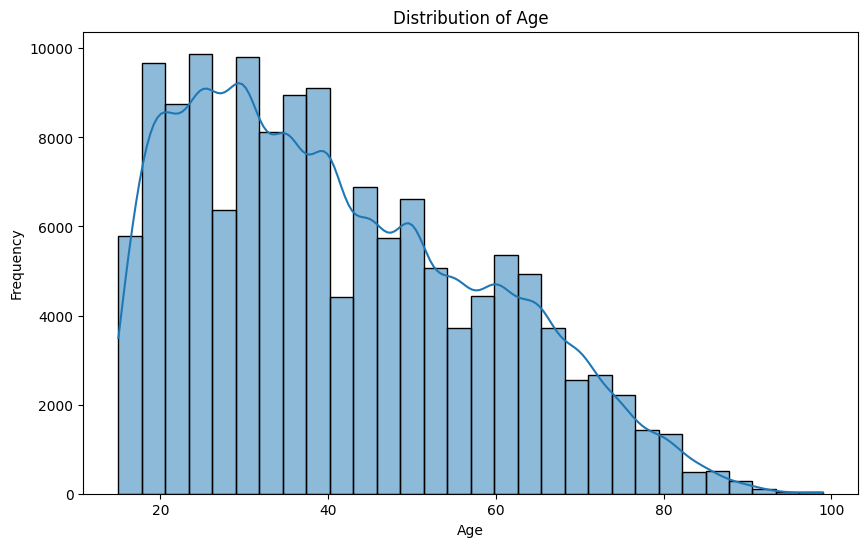

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*Distribution of income quintiles*

<ipython-input-71-c3866ac0f85f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='inc_q', data=data_cleaned, palette='viridis')


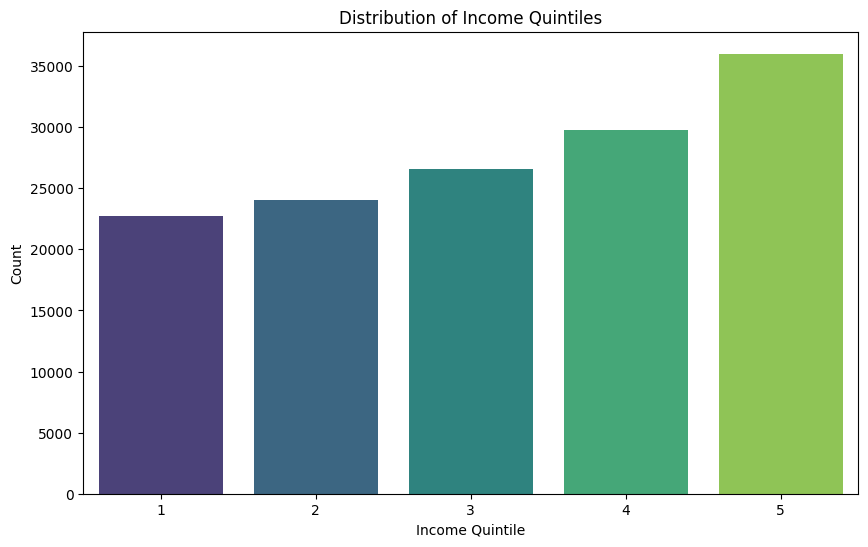

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='inc_q', data=data_cleaned, palette='viridis')
plt.title('Distribution of Income Quintiles')
plt.xlabel('Income Quintile')
plt.ylabel('Count')
plt.show()

*Distribution of education levels*

<ipython-input-72-9cf91c1f8989>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='educ', data=data_cleaned, palette='magma')


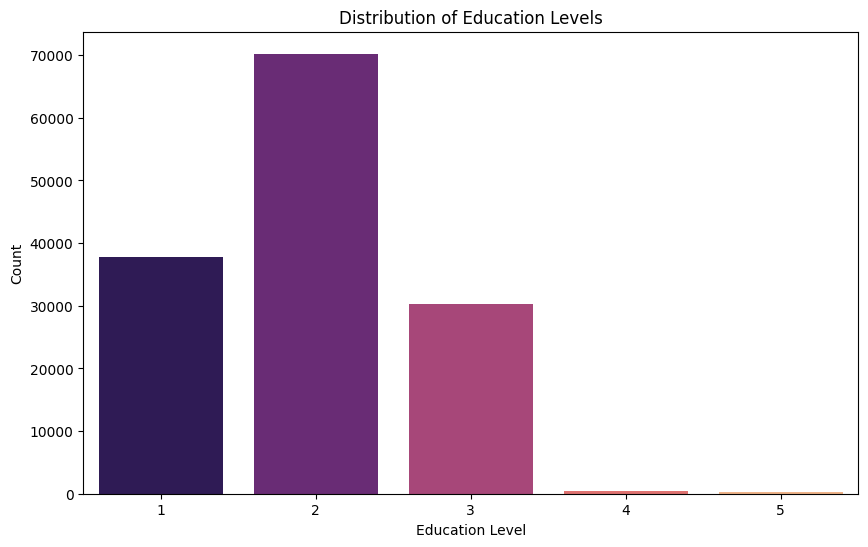

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='educ', data=data_cleaned, palette='magma')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

*Plotting the distribution of social transfers, pensions, and remittances*

<ipython-input-73-9021fd7be7bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='receive_transfers', data=data_cleaned, palette='Blues')
<ipython-input-73-9021fd7be7bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='receive_pension', data=data_cleaned, palette='Greens')
<ipython-input-73-9021fd7be7bd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remittances', data=data_cleaned, palette='Oranges')


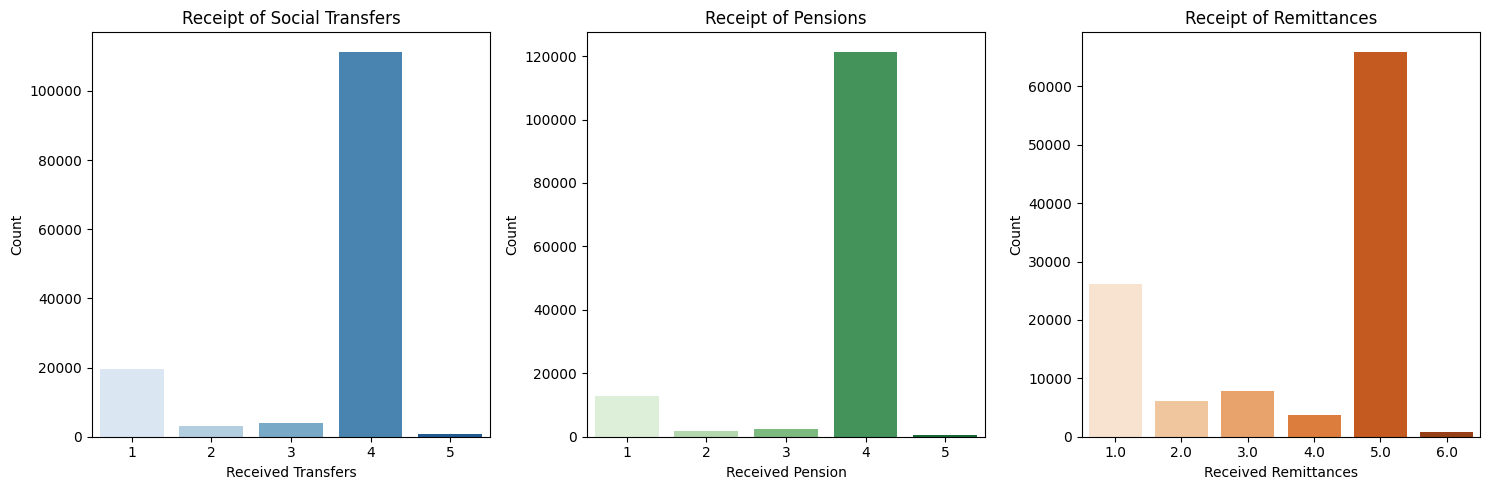

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='receive_transfers', data=data_cleaned, palette='Blues')
plt.title('Receipt of Social Transfers')
plt.xlabel('Received Transfers')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='receive_pension', data=data_cleaned, palette='Greens')
plt.title('Receipt of Pensions')
plt.xlabel('Received Pension')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.countplot(x='remittances', data=data_cleaned, palette='Oranges')
plt.title('Receipt of Remittances')
plt.xlabel('Received Remittances')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
df_numeric = data_cleaned.select_dtypes(include=[np.number])
df_numeric.head()
#corr_matrix = data_cleaned.corr()

,pop_adult,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,account,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig,year
0,22647496.0,144274031,0.716416,2,43.0,2,4,1.0,1.0,1,...,4,4,4.0,1,5.0,1,2,1,0.0,2021
1,22647496.0,180724554,0.497408,2,55.0,1,3,1.0,1.0,0,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
2,22647496.0,130686682,0.650431,1,15.0,1,2,2.0,1.0,0,...,4,4,4.0,4,3.0,2,2,0,0.0,2021
3,22647496.0,142646649,0.991862,2,23.0,1,4,1.0,2.0,0,...,4,4,2.0,4,5.0,1,2,0,0.0,2021
4,22647496.0,199055310,0.554940,1,46.0,1,1,2.0,1.0,0,...,4,4,4.0,4,5.0,2,2,0,0.0,2021


*Impact of Receiving Social Transfers, Pensions, and Remittances on Saving Behavior*

Relationship Between Saving and Receiving Transfers, Pensions, and Remittances

In [ ]:
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

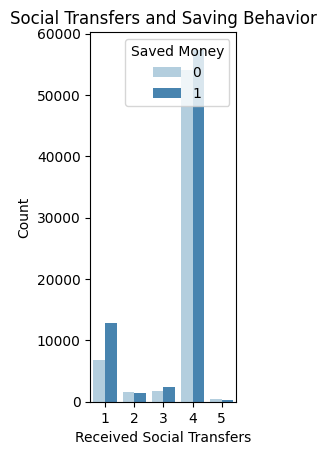

In [ ]:
plt.subplot(1, 3, 1)
sns.countplot(x='receive_transfers', hue='saved', data=data_cleaned, palette='Blues')
plt.title('Social Transfers and Saving Behavior')
plt.xlabel('Received Social Transfers')
plt.ylabel('Count')
plt.legend(title='Saved Money', loc='upper right')

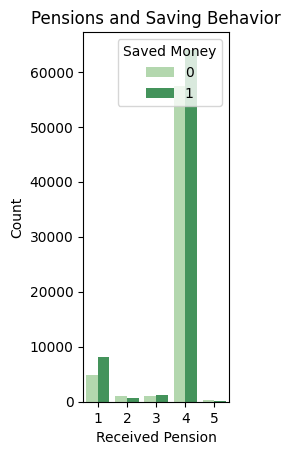

In [ ]:
plt.subplot(1, 3, 2)
sns.countplot(x='receive_pension', hue='saved', data=data_cleaned, palette='Greens')
plt.title('Pensions and Saving Behavior')
plt.xlabel('Received Pension')
plt.ylabel('Count')
plt.legend(title='Saved Money', loc='upper right')

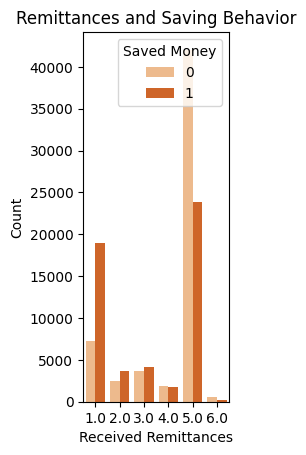

In [ ]:
plt.subplot(1, 3, 3)
sns.countplot(x='remittances', hue='saved', data=data_cleaned, palette='Oranges')
plt.title('Remittances and Saving Behavior')
plt.xlabel('Received Remittances')
plt.ylabel('Count')
plt.legend(title='Saved Money', loc='upper right')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

*Chi-square tests for independence*
This will test whether receiving social transfers, pensions, or remittances is statistically significantly associated with saving behavior.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_transfers = pd.crosstab(data_cleaned['receive_transfers'], data_cleaned['saved'])
chi2, p_transfers, dof, expected = chi2_contingency(contingency_transfers)
print(f"Chi-Square Test for Social Transfers and Saving Behavior: p-value = {p_transfers}")

Chi-Square Test for Social Transfers and Saving Behavior: p-value = 2.84459746517949e-309


In [ ]:
contingency_pension = pd.crosstab(data_cleaned['receive_pension'], data_cleaned['saved'])
chi2, p_pension, dof, expected = chi2_contingency(contingency_pension)
print(f"Chi-Square Test for Pensions and Saving Behavior: p-value = {p_pension}")

Chi-Square Test for Pensions and Saving Behavior: p-value = 1.8020187733937775e-155


In [ ]:
contingency_remittances = pd.crosstab(data_cleaned['remittances'], data_cleaned['saved'])
chi2, p_remittances, dof, expected = chi2_contingency(contingency_remittances)
print(f"Chi-Square Test for Remittances and Saving Behavior: p-value = {p_remittances}")

Chi-Square Test for Remittances and Saving Behavior: p-value = 0.0


*Summary*

In [ ]:
summary = """
From the analysis, we observe the following:
1. **Social Transfers:** Individuals who receive social transfers show a higher probability of saving behavior compared to those who do not.
2. **Pensions:** Receipt of pensions also positively influences the likelihood of saving.
3. **Remittances:** Individuals receiving remittances similarly show a tendency to save more than those who do not receive remittances.

The results from the logistic regression analysis suggest that receiving financial support in the form of social transfers, pensions, or remittances has a significant and positive impact on the economic behavior of individuals, specifically in terms of saving behavior.
"""

print(summary)


From the analysis, we observe the following:
1. **Social Transfers:** Individuals who receive social transfers show a higher probability of saving behavior compared to those who do not.
2. **Pensions:** Receipt of pensions also positively influences the likelihood of saving.
3. **Remittances:** Individuals receiving remittances similarly show a tendency to save more than those who do not receive remittances.

The results from the logistic regression analysis suggest that receiving financial support in the form of social transfers, pensions, or remittances has a significant and positive impact on the economic behavior of individuals, specifically in terms of saving behavior.

